## <center> MATH 104A - Homework 6 
#### <center>By Emily Lu 

(Section 3.5) 

1\. Determine the natural cubic spine $S$ that interpolates the data $f(0)=0,\; f(1)=1,$ and $f(2) = 2$. 

In [189]:
import numpy as np
from scipy.interpolate import CubicSpline

def naturalCubicSpline(vec_x, vec_y, x = 0):
    
    cs = CubicSpline(vec_x, vec_y, bc_type = 'natural')
    a = [cs.c.item(3,i) for i in range(len(vec_x)-1)]
    b = [cs.c.item(2,i) for i in range(len(vec_x)-1)]
    c = [cs.c.item(1,i) for i in range(len(vec_x)-1)]
    d = [cs.c.item(0,i) for i in range(len(vec_x)-1)]
    
    SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
    SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    Sx = [] 
    Sx1 = [] 
    for i in range(len(vec_x)-1):
        S_i = 'S'+str(i).translate(SUB)+'('+str(vec_x[i])+'<=x<='+str(vec_x[i+1])+') = '
        eqn1 = str(a[i])+' + '+str(round(b[i], 5))+'(x - '+str(vec_x[i])+') + '+str(round(c[i], 5))
        eqn2 = '(x - '+str(vec_x[i])+')2 + '.translate(SUP)+str(round(d[i], 5))+'(x - '+str(vec_x[i])+')3'.translate(SUP)
        Sx.append(S_i+eqn1+eqn2)
        
    return(cs(x), Sx, cs.derivative())

fx, S, S1 = naturalCubicSpline([0,1,2], [0,1,2])
for i in S:
    print(i)

S₀(0<=x<=1) = 0.0 + 1.0(x - 0) + 0.0(x - 0)² + 0.0(x - 0)³
S₁(1<=x<=2) = 1.0 + 1.0(x - 1) + 0.0(x - 1)² + 0.0(x - 1)³


3\. Construct the natural cubic spline for the following data.

$\;\;\;\;$ a. 

$x$ | $f(x)$ |
--- | ------ | 
8.3 | 17.56492 |
8.6 | 18.50515 |

In [199]:
fx, S, S1 = naturalCubicSpline([8.3, 8.6], [17.56492, 18.50515])
print(S[0])

S₀(8.3<=x<=8.6) = 17.56492 + 3.1341(x - 8.3) + 0.0(x - 8.3)² + 0.0(x - 8.3)³


$\;\;\;\;$ d. 

$x$ | $f(x)$ |
--- | ------ | 
0.1 | -0.62049958 |
0.2 | -0.28398668 |
0.3 | 0.00660095 |
0.4 | 0.24842440 |

In [191]:
fx, S, S1 = naturalCubicSpline([0.1, 0.2, 0.3, 0.4], [-0.62049958, -0.28398668, 0.00660095, 0.24842440])
for i in S:
    print(i)

S₀(0.1<=x<=0.2) = -0.62049958 + 3.45509(x - 0.1) + 0.0(x - 0.1)² + -8.99579(x - 0.1)³
S₁(0.2<=x<=0.3) = -0.28398668 + 3.18521(x - 0.2) + -2.69874(x - 0.2)² + -0.9463(x - 0.2)³
S₂(0.3<=x<=0.4) = 0.00660095 + 2.61708(x - 0.3) + -2.98263(x - 0.3)² + 9.9421(x - 0.3)³


5\. The data in Exercise 3 were generated using the following functions. Use the cubic splines constructed
in Exercise 3 for the given value of $x$ to approximate $f(x)$ and $f'(x)$ and calculate the actual error.

$\;\;\;\;$ a. $f(x) = x\ln x;$ approximate $f(8.4)$ and $f'(8.4)$. 

In [198]:
f = lambda x: x*np.log(x)
f1 = lambda x: np.log(x) + 1

fx, S, S1 = naturalCubicSpline([8.3, 8.6], [17.56492, 18.50515], x = 8.4)

print('Given that', S[0] + ', then the approximation to f(x) is', str(fx)+'.','Actual value is', str(f(8.4))+', so error is '+str(abs(f(8.4)-fx))+'.')
print("\nApproximation to f'(x) is", S1(8.4), 'and actual value is', f1(8.4), 'so the error is', str(abs(f1(8.4)-S1(8.4)))+'.')
    

Given that S₀(8.3<=x<=8.6) = 17.56492 + 3.1341(x - 8.3) + 0.0(x - 8.3)² + 0.0(x - 8.3)³, then the approximation to f(x) is 17.878330000000002. Actual value is 17.87714632913385, so error is 0.0011836708661512318.

Approximation to f'(x) is 3.13410000000001 and actual value is 3.128231705849268 so the error is 0.005868294150741971.


$\;\;\;\;$ d. $f(x) = x\cos x - 2x^2 +3x -1;$ approximate $f(0.25)$ and $f'(0.25)$. 

In [196]:
from math import *

f = lambda x: x*cos(x) - 2*x**2 + 3*x - 1
f1 = lambda x: cos(x) - x*sin(x) - 4*x + 3

fx, S, S1 = naturalCubicSpline([0.1, 0.2, 0.3, 0.4], [-0.62049958, -0.28398668, 0.00660095, 0.24842440], x = 0.25)
print('Given', S[1]+', the approximation to f(0.25) is', fx, 'and the actual value is', str(f(0.25))+', so the error is', str(abs(f(0.25)-fx)))
print("\nApproximation to f'(0.25) is", S1(0.25), 'and actual value is', f1(0.25), 'so the error is', str(abs(f1(0.25)-S1(0.25)))+'.')

Given S₁(0.2<=x<=0.3) = -0.28398668 + 3.18521(x - 0.2) + -2.69874(x - 0.2)² + -0.9463(x - 0.2)³, the approximation to f(0.25) is -0.13159115625 and the actual value is -0.13277189457233884, so the error is 0.0011807383223388368

Approximation to f'(0.25) is 2.908242058333334 and actual value is 2.907061431897014 so the error is 0.0011806264363203312.


14\. A clamped cubic spline s for a function $f$ is defined by $$ s(x) = \begin{cases} \small s_0(x) = 1 + Bx + 2x^2 - 2x^3, \; &\text{if}
\; 0\leq x<1, \\ s_1(x) = 1 + b(x-1)-4(x-1)^2 + 7(x-1)^3, \; &\text{if}\; 1\leq x \leq 2. \small \end{cases} $$ Find $f'(0)$ and $f'(2)$.

$\;\;\;\;$_Sol._ 

Since $f$ is defined by $$ s(x) = \begin{cases} \small s_0(x) = 1 + Bx + 2x^2 - 2x^3 \; &\text{if}
\; 0\leq x<1, \\ s_1(x) = 1 + b(x-1)-4(x-1)^2 + 7(x-1)^3 \; &\text{if}\; 1\leq x \leq 3, \small \end{cases} $$ then $f'(0) = s_0'(0)$ and $f'(2) = s_1'(2).$ First, we need to find $B$ and $b$. Since $s_0(1) = s_1(1),\; s_0'(1)=s_1'(1),\;s_0''(1)=s_1''(1)$, then $s_0(1) = s_1(1)$ implies $$1+B = 1 \Longleftrightarrow B=0$$ and $ s_0'(1)=s_1'(1)$ implies $$B+4-6=b \Longleftrightarrow b = -2.$$ Therefore, $$ s(x) = \begin{cases} \small s_0(x) = 1 + 2x^2 - 2x^3, \; &\text{if}
\; 0\leq x<1, \\ s_1(x) = 1 - 2(x-1)-4(x-1)^2 + 7(x-1)^3, \; &\text{if}\; 1\leq x \leq 2. \small \end{cases} $$ So, $f'(0) = 0$ and $f'(2) = 11.$


(Section 3.6)

1\. Let $(x_0, y_0) = (0,0)$ and $(x_1,y_1) = (5,2)$ be the endpoints of a curve. Use the given guidepoints to construct parametric cubic Hermite approximations $(x(t), y(t))$ to the curve and graph the approximations. 

$\;\;\;\;$ a. (1, 1) and (6, 1)

$\;\;\;\;$_Sol._ Given the guidepoint for $(x_0, y_0)$ is $(x_0+\alpha_0, y_0+\beta_0)$ and the guidepoint for $(x_1, y_1)$ is $(x_1-\alpha_1, y_1-\beta_1),$ then $\alpha_0=1,\;\beta_0=1,\;\alpha_1=-1$ and $\beta_1=1$. So plugging this into the parametric cubic Hermite approximation equations given in the textbook, we get $x(t) = -10t^3+14t^2+t$ and $y(t) = -2t^3 + 3t^2 + t$.   

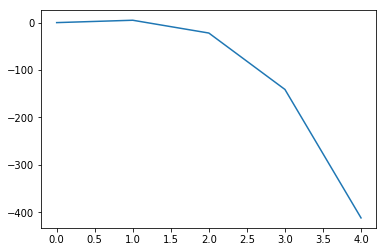

In [203]:
import numpy as np  
import matplotlib.pyplot as plt  

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  
    
graph(lambda x: -10*x**3 + 14*x**2 + x, range(0, 5))

$\;\;\;\;$ d. (2, 2) and (7, 0)

$\;\;\;\;$_Sol._ Given the guidepoint for $(x_0, y_0)$ is $(x_0+\alpha_0, y_0+\beta_0)$ and the guidepoint for $(x_1, y_1)$ is $(x_1-\alpha_1, y_1-\beta_1),$ then $\alpha_0=0.5,\;\beta_0=0.5,\;\alpha_1=-0.5$ and $\beta_1=0.5$. So plugging this into the parametric cubic Hermite approximation equations given in the textbook, we get $x(t) = -10t^3+13t^2 + 2t$ and $y(t) = 2t$.   

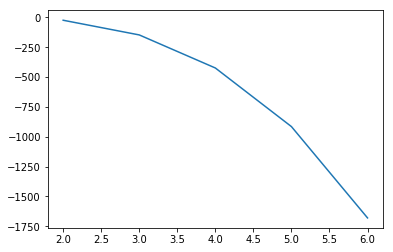

In [204]:
graph(lambda x: -10*x**3 + 13*x**2 + 2*x, range(2, 7))

3\. Construct and graph the cubic Bezier polynomials given the following points and guidepoints.

$\;\;\;\;$ c. Point (0, 0) with guidepoint (0.5, 0.5) to point (4, 6) with entering guidepoint (3.5, 7) and exiting guidepoint with (4.5, 5) to point (6, 1) with guidepoint (7, 2). 

$\;\;\;\;$_Sol._ For $t$ between (0, 0) and (4, 6), we have that $\alpha_0=0.5,\;\beta_0=0.5,\;\alpha_1=0.5$ and $\beta_1=-1$ which gives us the cubic Bezier polynomials: $$x(t) = -5t^3 + 7.5t^2 + 1.5t \; \text{and}\; y(t) = -13.5t^3+18t^2+1.5t.$$ 

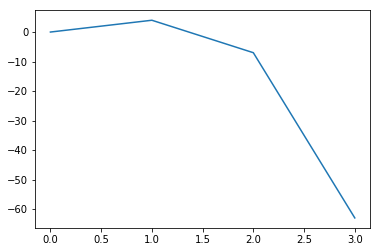

In [206]:
graph(lambda x:-5*x**3 + 7.5*x**2 + 1.5*x, range(0, 4))

As for $t$ between (4, 6) and (6, 1), we have that $\alpha_0=0.5,\;\beta_0=-1,\;\alpha_1=-1$ and $\beta_1=-1$ which gives us the cubic Bezier polynomials: $$x(t) = -5.5t^3 + 6t^2 + 1.5t +4 \; \text{and}\; y(t) = 4t^3-6t^2-3t+6.$$

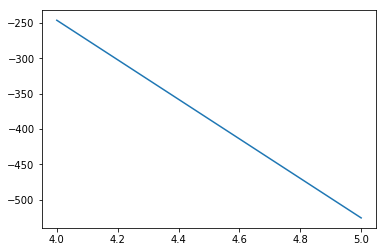

In [207]:
graph(lambda x: -5.5*x**3 + 6*x**2 + 1.5*x + 4, range(4, 6))

$\;\;\;\;$ d. Point (0, 0) with guidepoint (0.5, 0.5) to point (2, 1) with entering guidepoint (3, 1) and exiting guidepoint (3, 1) to point (4, 0) with entering guidepoint (5, 1) and exiting guidepoint (3, -1) to point (6, -1) with guidepoint (6.5, -0.25). 

$\;\;\;\;$_Sol._ For $t$ between (0, 0) and (2, 1), we have that $\alpha_0=0.5,\;\beta_0=0.5,\;\alpha_1=-1$ and $\beta_1=0$ which gives us the cubic Bezier polynomials: $$x(t) = -5.5t^3 + 6t^2 + 1.5t \; \text{and}\; y(t) = -0.5t^3+1.5t.$$ 

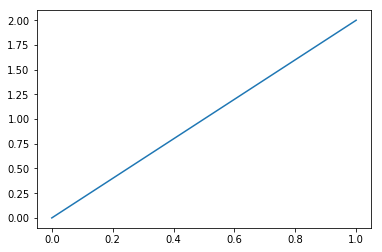

In [208]:
graph(lambda x: -5.5*x**3 + 6*x**2 + 1.5*x, range(0, 2))

As for $t$ between (2, 1) and (4, 0), we have that $\alpha_0=1,\;\beta_0=0,\;\alpha_1=-1$ and $\beta_1=-1$ which gives us the cubic Bezier polynomials: $$x(t) = -4t^3+3t^2+3t+2 \; \text{and}\; y(t) = -t^3+1.$$

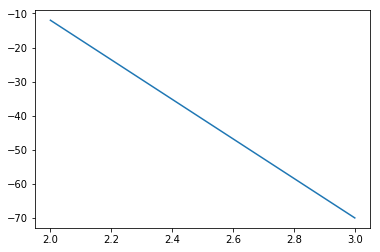

In [210]:
graph(lambda t: -4*t**3 + 3*t**2 + 3*t + 2, range(2, 4))

5\. Suppose a cubic Bezier polynomial is placed through $(u_0,\; v_0)$ and $(u_3, \; v_3)$ with guidepoints $(u_1, \; v_1)$ and $(u_2, \; v_2)$, respectively. 

$\;\;\;\;$ a. Derive the parametric equations for $u(t)$ and $v(t)$ assuming that $$ u(0) = u_0 \; u(1) = u_3, \; u'(0) = u_1 -u_0, \; u'(1) = u_3-u_2$$ $\;\;\;\;$  and  $$v(0) = v_0, \; v(1) = v_3, \; v'(0) = v_1 - v_0, \; v'(1) = v_3 - v_2.$$ 

$\;\;\;\;$_Sol._ The Hermite interpolation (forward-divided difference) gives us the following table: 

$\;$ | $\;$ | $\;$ | $\;$ | $\;$ | 
--- | ------ | ------- |  ------ | ------- | 
0 | $u_0$ | $\;$ | $\;$ | $\;$ |
0 | $u_0$  | $3(u_1 -u_0)$ |  $\;$ | $\;$ |
1 | $u_3$  | $u_3 -u_0$ |  $u_3-3u_1+2u_0$ | $\;$ |
1 | $u_3$  | $3(u_3 -u_2)$ |  $2u_3-3u_2+u_0$ | $u_3-3u_2+3u_1-u_0$ |

So by the Hermite interpolation formula, $$u(t) = u_0 + 3(u_1 - u_0)t+(-6u_1 - 3u_0 + 3u_2)t^2+(u_3-3u_2+3u_1-u_0)t^3$$ and $$v(t) = v_0 + 3(v_1 - v_0)t+(3v_2-6v_1+3v_0)t^2 + (v_3-3v_2+3v_1-v_0)t^3.$$

$\;\;\;\;$ b. Let $f(i/3) = u_i$, for $i = 0,1,2,3,$ and $g(i/3) = v_i,$ for $i = 0, 1, 2, 3.$ Show that the Bernstein polynomial of degree three in $t$ for $f$ is $u(t)$ and the Berstein polynomial of degree three in $t$ for $g$ is $v(t)$. (See Exercise 23 of Section 3.1).

$\;\;\;\;$_Sol._ Given the formula for the Bernstein polynomial is $$B_n(x) = \sum_{k = 0}^n \begin{pmatrix} n \\ k \end{pmatrix} f \begin{pmatrix} \frac{k}{n} \end{pmatrix} x^k (1-x)^{n-k},$$ we get that $\begin{eqnarray} f(t) &=& u_0(1-t)^3 + 3u_1t(1-t)^2 + 3u_2t^2(1-t)+3u_3t^3 \\ &=& u_0 + 3(u_1-u_0)t+(3u_2-6u_1-3u_0)t^2 + (u_3-3u_2+3u_1-u_0)t^3 \end{eqnarray}$ Therefore $f$ is $u(t)$ as obtained in part a. And similarly, $\begin{eqnarray} g(t) &=& \sum_{k = 0}^3 \begin{pmatrix} 3 \\ k \end{pmatrix} v_kt^k (1-t)^{3-k} \\ &=& v_0 + 3(v_1 - v_0)t+(3v_2-6v_1+3v_0)t^2 + (v_3-3v_2+3v_1-v_0)t^3 \\ &=& v(t) \end{eqnarray}$ as obtained in part a.  